In [1]:
%matplotlib notebook


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
#import matplotlib.colors 
import matplotlib.cm as cm
#import scipy.interpolate as inter
import os
from scipy.optimize import curve_fit
# from lmfit import Model, Parameters
# from lmfit import Parameter
import sys

folder_that_contains_code="/Users/davidkramer/Dropbox/kramerLabSoftware/IDEASpec/IDEASpecPy/"

#adds the folder to your system path
sys.path.append(os.path.abspath(folder_that_contains_code)) #AK_ECS_multiwavelength_DMK_3 for fast_NPQ_3e-Copy2.py"))

# #imports the code for this analysis
# import AK_ECS_multiwavelength as ak

import IDEASpecPy as Ipy

In [3]:
#recalculate the Abs data using a particular set of I0 points
# input the dataframe, and optionally a list of measuring_light_names and the suffix to use, 
# and a list of points to average for the I0 value to use in the calculation.

# for example, 

# recalcAbsUsingI0 (sample_df, ['475', '488', '505', '520', '535', '545'], I_suffix='_I', [0,1]):
# the '_I' will be attached to the end of the wavelength when searching the dataframe
#in this 


def recalcAbsUsingI0 (df, list_of_measuring_lights=df['measuring_light_names'][0], I_suffix='_I', I0_points=[0,1], trim_points=[0,-1], newSufficx='_rDA'):
    if (I0_points[0] == I0_points[1]):
        I0_points[1]=I0_points[0]+1
    for wl in df['measuring_light_names'][0]:
        df[wl + newSufficx] = 0
        df[wl + newSufficx] = df[wl + newSufficx].astype('object')
    
    for t in range(len(df)): #['475']:
        for wl in df['measuring_light_names'][t]:
            
            I0=np.mean(np.array(df[wl+ '_I'][t][I0_points[0]:I0_points[1]]))
            daTrace = -1*np.log10(np.array(df[wl+ '_I'][t])/I0) #np.array(df[wl+ '_I'][t][0]))
            df[wl + newSufficx][t] = daTrace #[trim_points[0]:trim_points[1]]
            



NameError: name 'df' is not defined

In [508]:
#load the sample data from spreadsheet

folder_name='' #/Users/davidkramer/Dropbox/Data/atsuko/Rapid NPQ 041819/'

# if os.path.isdir(folder_name)==False:
#     folder_name='/Users/davidkramer/Dropbox/Data/atsuko/ePBR_coral_data/December_2016/'

file_name='/Users/davidkramer/Dropbox/Data/atsuko/Rapid qE JSON/gg18.datcombined.json'

open_file_name=folder_name+file_name
#sample_df=pd.read_table(open_file_name, sep='\t')

sample_df=pd.read_json(open_file_name) #, usecols=load_cols)

In [617]:
sample_df

475_I  \
0  [0.8132933999999999, 0.8119200999999999, 0.811...   
1  [0.8151244999999999, 0.814209, 0.8132935, 0.81...   
2  [0.8172607, 0.8151244999999999, 0.816040000000...   
3  [0.8181763, 0.8172607, 0.8163452, 0.8166504, 0...   

                                              475_I0  \
0  [6.708374, 6.699219, 6.698685, 6.699142, 6.699...   
1  [6.723328, 6.713257, 6.712952, 6.713257, 6.713...   
2  [6.734009, 6.723022, 6.722717, 6.723022, 6.723...   
3  [6.739197, 6.72821, 6.72699, 6.727295, 6.72790...   

                                             475_I0a  \
0  [-10, -10, -10, -10, -10, -10, -10, -10, -10, ...   
1  [-10, -10, -10, -10, -10, -10, -10, -10, -10, ...   
2  [-10, -10, -10, -10, -10, -10, -10, -10, -10, ...   
3  [-10, -10, -10, -10, -10, -10, -10, -10, -10, ...   

                                              475_Ia  \
0  [0.12336739999999999, 0.1213074, 0.12199399999...   
1  [0.123291, 0.1217651, 0.1217651, 0.12115479999...   
2  [0.123291, 0.12115479999999999, 0.1217651, 0.1...   
3  [0.123291, 0.1208496, 0.1217651, 0.1217651, 0....   

                                            475_calc  \
0  [0.003709172, 0.004443123, 0.004647186, 0.0045...   
1  [0.0037421850000000003, 0.004230248000000001, ...   
2  [0.00368672, 0.004823405, 0.00433589, 0.004823...   
3  [0.003776026, 0.0042622680000000005, 0.0047490...   

                                           475_calca  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0.12083909999999999, 0.1262476, 0.1262476, 0....   
2  [0.1213563, 0.12894709999999998, 0.1267647, 0....   
3  [0.1210546, 0.1297408, 0.1264631, 0.1264631, 0...   

                                            475_time  \
0  [0.0142, 0.035568999999999996, 0.0569379999999...   
1  [145.404, 145.4254, 145.4468, 145.4681, 145.48...   
2  [181.5341, 181.5555, 181.5768, 181.5982, 181.6...   
3  [218.5142, 218.5356, 218.5569, 218.5783, 218.5...   

                                          475auxtime  \
0  [0.0142, 0.035568999999999996, 0.0569379999999...   
1  [145.404, 145.4254, 145.4468, 145.4681, 145.48...   
2  [181.5341, 181.5555, 181.5768, 181.5982, 181.6...   
3  [218.5142, 218.5356, 218.5569, 218.5783, 218.5...   

                                               488_I  \
0  [0.2915192, 0.2906799, 0.29045099999999996, 0....   
1  [0.2920532, 0.2911377, 0.2905273, 0.2902222, 0...   
2  [0.2914429, 0.2908325, 0.2914429, 0.2908325, 0...   
3  [0.29266359999999997, 0.2914429, 0.2908325, 0....   

                                              488_I0  \
0  [3.663788, 3.6515050000000002, 3.648682, 3.647...   
1  [3.66333, 3.651733, 3.649292, 3.647156, 3.6474...   
2  [3.666992, 3.654175, 3.651123, 3.649597, 3.648...   
3  [3.667297, 3.652344, 3.650208, 3.648682, 3.648...   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           

                                         505_calc_mb  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [-0.00012020500000000018, -8.218800000000018e-...   
2  [-0.0005215930000000001, -0.000331432000000000...   
3                                                  0   

                                         520_calc_mb  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [7.320600000000014e-05, 9.900000000000013e-05,...   
2  [-0.000215336, -0.00024130899999999988, -0.000...   
3                                                  0   

                                         535_calc_mb  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [6.581099999999982e-05, 0.00011028799999999984...   
2  [-0.0006953370000000003, -0.000738828, -0.0003...   
3                                                  0   

                                         545_calc_mb  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1

In [615]:
baselineTrace=sample_df[sample_df['trace_label']=='baseline']



# The subtraceBaseline funciton adds a set of traces where the baseline is subtracted. The baseline MUST BE
# the same trace EXCEPT that no catinic was changed AND it is saved with a specific label, e.g. "baseline". 
# The wavelengths paramter is a list of the wavelengths upon which traces to subtract.
# The suffix paramter is the suffix for the traces of interest (e.g. '_calc') 

def subtractBaseline(sample_df, wavelengths, suffix, newSuffix, baselineLabel = 'baseline'):
    baseline=sample_df[sample_df['trace_label']==baselineLabel]
    traces=sample_df[sample_df['trace_label']=='fluct']
    
    for  wli in range(len(wavelengths)):
        
        wl=str(wavelengths[wli])
        sample_df[str(wl) + newSuffix] = 0
        sample_df[str(wl) + newSuffix] = sample_df[str(wl) + newSuffix].astype('object')
        for i in range(0, len(sample_df[wl+suffix])): # cyclie through the traces for each wl
            print(i)
            sample_df[str(wl) + newSuffix][i] = np.array(sample_df[wl + suffix][i]) - np.array(baseline[wl + suffix][0])
        
#len(sample_df['475_time'][0]), len(sample_df['475_I'][0])

subtractBaseline(sample_df, wavelengths, "_calc", "_calc_m_b")


0


/Users/davidkramer/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3


<IPython.core.display.Javascript object>


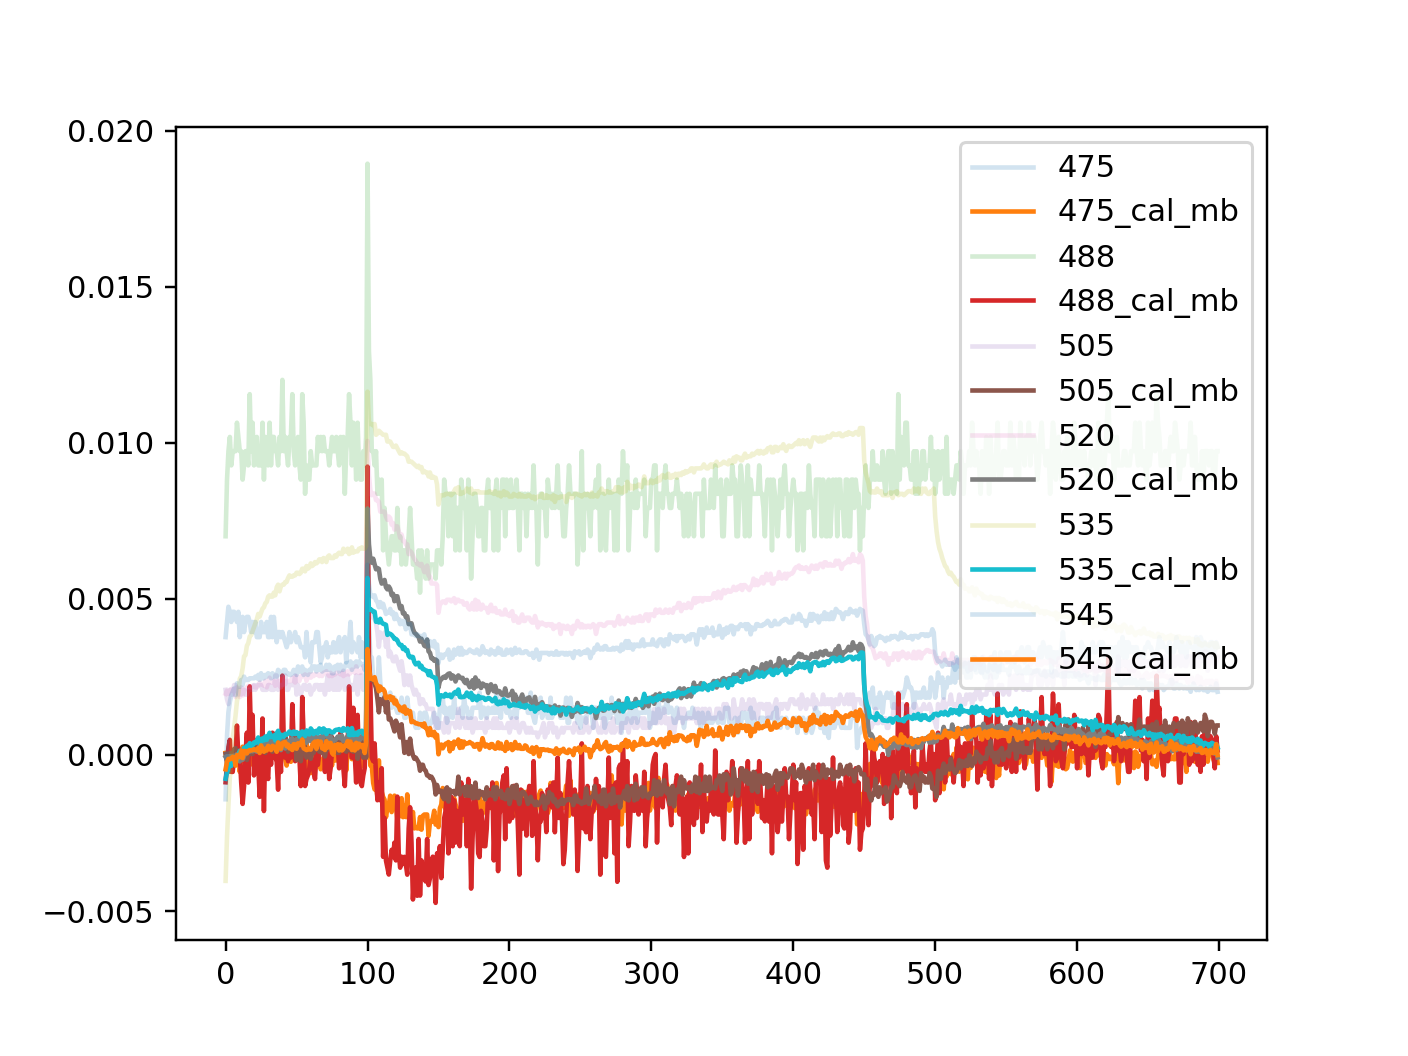

In [618]:
plt.figure()

for t in [3]: #range(len(sample_df)): #['475']:
    for wl in wavelengths:
        plt.plot(sample_df[str(wl)+'_calc'][t], label=wl, alpha=.2)
        plt.plot(sample_df[str(wl)+'_calc_m_b'][t], label=str(wl) + '_cal_mb')
plt.legend()
plt.show()

    

In [512]:
from scipy.optimize import curve_fit #see the following link for info on curve_fit


def fit_burn(x,a,b,c):
    
    # Expecting absorbance data over time for the baseline, during which there will be a
    #burn in artifact from changes in LED intensity and color. 
    #I will fit the baseline with a hyperbolic or exponential
    # a is the amplitude of the burn-in
    # b is the time constant
    # c is the offset
    fit_burn = c + a/(1+x/b)
    return (fit_burn)

#correct_burn_in 

# def correct_burn_in(test_data, correct_these_traces):
#     for trace_name in correct_these_traces:
#         total_number_points=len(test_data['time_' + trace_name])

#         length_of_sub_trace=300
#         length_of_baseline=100
#         length_of_post_baseline=0
#         bopb=length_of_sub_trace - length_of_post_baseline

#         total_subtraces=int(total_number_points/length_of_sub_trace)
#         print('total_subtraces=' + str(total_subtraces))

#         corrected_y_data=[]
#         zeroed_y_data=[]
        
#         for i in range(0,total_subtraces):
            
#             #print(len(test_data['time_' + trace_name]))

#             index=i*length_of_sub_trace
            
#             pre_baseline=test_data['time_' + trace_name][index:index+length_of_baseline]
#             post_baseline=test_data['time_' + trace_name][index+bopb:index+length_of_sub_trace]

#             x_data=np.array(pre_baseline.append(post_baseline))

#             x_data=x_data-x_data[0]

#             y_data_pre_baseline=test_data['Calc_' + trace_name][index:index+length_of_baseline]
#             y_data_post_baseline=test_data['Calc_' + trace_name][index+bopb:index+length_of_sub_trace]
#             y_data=np.array(y_data_pre_baseline.append(y_data_post_baseline))

#             popt, pcov = curve_fit(fit_burn, x_data, y_data, p0=[.001,1,.001], bounds=([-np.inf, 0, -np.inf], np.inf))

#             offset_data_x=np.array(test_data['time_' + trace_name][index:index+length_of_sub_trace])
#             offset_data_x=offset_data_x-offset_data_x[0]
#             fit_y=fit_burn(offset_data_x,popt[0],popt[1],popt[2])
#             fit_y=np.array(fit_y)

#             y_data=np.array(test_data['Calc_' + trace_name][index:index+length_of_sub_trace])

#             fixed_y=y_data-fit_y
#             fixed_y=fixed_y+y_data[0]
#             for v in fixed_y:
#                 corrected_y_data.append(v)
#                 zeroed_y_data.append(v-fixed_y[0]) #subtract off the first point in each subtrace 
                
#         print(len(corrected_y_data))
        
#         test_data['Corr_'+ trace_name]=corrected_y_data
#         test_data['Zeroed_'+ trace_name]=zeroed_y_data
#     return(test_data)




In [513]:
df=sample_df
for wl in df['measuring_light_names'][t]:
    df[wl + '_rDA'] = 0
    df[wl + '_rDA'] = df[wl + '_rDA'].astype('object')


In [514]:

recalcAbsUsingI0(sample_df, df['measuring_light_names'][0], '_I', [90,100], [90,-1])    

/Users/davidkramer/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [515]:
sample_df.keys()

Index(['475_I', '475_I0', '475_I0a', '475_Ia', '475_calc', '475_calca',
       '475_time', '475auxtime', '488_I', '488_I0', '488_I0a', '488_Ia',
       '488_calc', '488_calca', '488_time', '488auxtime', '505_I', '505_I0',
       '505_I0a', '505_Ia', '505_calc', '505_calca', '505_time', '505auxtime',
       '520_I', '520_I0', '520_I0a', '520_Ia', '520_calc', '520_calca',
       '520_time', '520auxtime', '535_I', '535_I0', '535_I0a', '535_Ia',
       '535_calc', '535_calca', '535_time', '535auxtime', '545_I', '545_I0',
       '545_I0a', '545_Ia', '545_calc', '545_calca', '545_time', '545auxtime',
       'actinic_intensity', 'blue_I', 'blue_I0', 'blue_I0a', 'blue_Ia',
       'blue_actinic', 'blue_calc', 'blue_calca', 'blue_time', 'blueauxtime',
       'far_red', 'flash', 'measuring_interval', 'measuring_light',
       'measuring_light_names', 'measuring_pulse_duration', 'note',
       'number_loops', 'number_measuring_lights', 'number_pulses',
       'protocol_label', 'protocol_number', '

In [619]:
sample_df[str(wl) + "_calc_m_b"]

0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [7.859749999999997e-05, -1.446799999999947e-06...
2    [-0.0006274560999999999, -0.000226081099999999...
3    [-0.00045869210000000005, -0.0002189151, -0.00...
Name: 545_calc_m_b, dtype: object

In [620]:
#sample_df.keys()

len(sample_df[str(wl) + "_calc_m_b"][3]), len(sample_df[str(wl) + '_time'][1])

(700, 700)

<IPython.core.display.Javascript object>


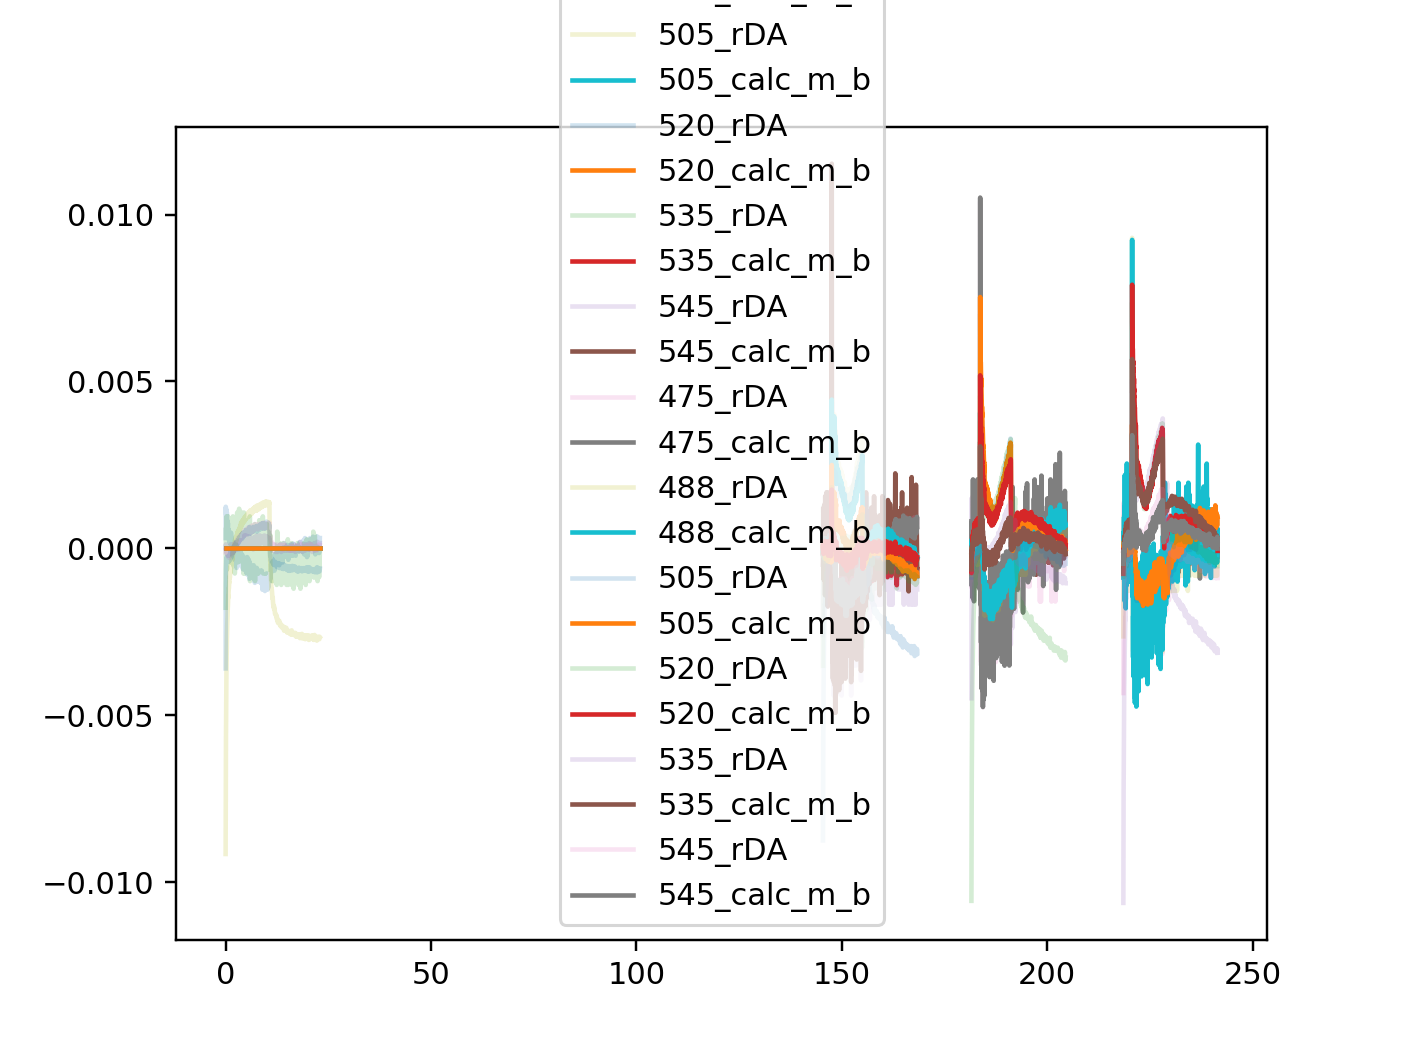

In [624]:
plt.figure()
for t in range(0,len(sample_df)): #['475']:
    for wl in wavelengths:
        plt.plot(sample_df[str(wl) + '_time'][t], sample_df[str(wl) + "_rDA"][t], label=str(wl) + "_rDA", alpha=.2)
        plt.plot(sample_df[str(wl) + '_time'][t], sample_df[str(wl) + "_calc_m_b"][t], label=str(wl) + "_calc_m_b")
        #plt.plot(sample_df[wl + "_rDA"][t], label=wl + "_rDA")

plt.legend()
plt.show()

In [518]:
sample_df.keys()

Index(['475_I', '475_I0', '475_I0a', '475_Ia', '475_calc', '475_calca',
       '475_time', '475auxtime', '488_I', '488_I0', '488_I0a', '488_Ia',
       '488_calc', '488_calca', '488_time', '488auxtime', '505_I', '505_I0',
       '505_I0a', '505_Ia', '505_calc', '505_calca', '505_time', '505auxtime',
       '520_I', '520_I0', '520_I0a', '520_Ia', '520_calc', '520_calca',
       '520_time', '520auxtime', '535_I', '535_I0', '535_I0a', '535_Ia',
       '535_calc', '535_calca', '535_time', '535auxtime', '545_I', '545_I0',
       '545_I0a', '545_Ia', '545_calc', '545_calca', '545_time', '545auxtime',
       'actinic_intensity', 'blue_I', 'blue_I0', 'blue_I0a', 'blue_Ia',
       'blue_actinic', 'blue_calc', 'blue_calca', 'blue_time', 'blueauxtime',
       'far_red', 'flash', 'measuring_interval', 'measuring_light',
       'measuring_light_names', 'measuring_pulse_duration', 'note',
       'number_loops', 'number_measuring_lights', 'number_pulses',
       'protocol_label', 'protocol_number', '

<IPython.core.display.Javascript object>


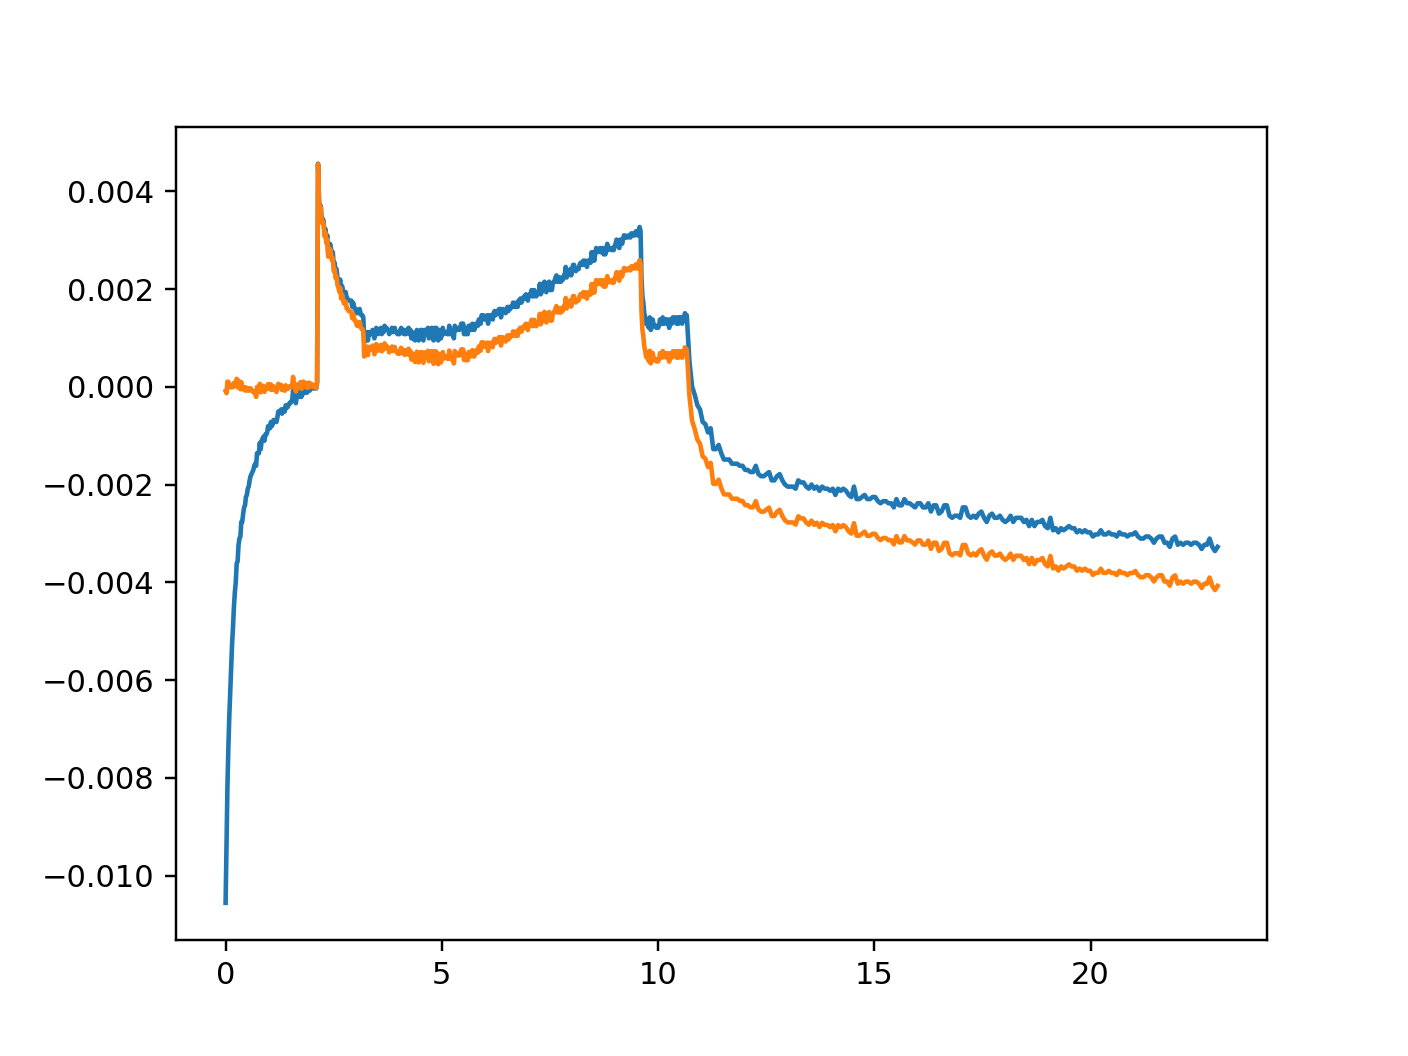

In [519]:
y_data=sample_df['535_rDA'][2]
x_data=np.array(sample_df['535_time'][0])
x_data=x_data-x_data[0]

# plt.figure()
# plt.plot(y_data)
# plt.show()

fit_b=0
fit_e=100

popt, pcov = curve_fit(fit_burn, x_data[fit_b:fit_e], y_data[fit_b:fit_e], p0=[.001,1,.001], bounds=([-np.inf, 0, -np.inf], np.inf))

corTrace=[]
for i, x in enumerate(x_data):
    vc = y_data[i] - fit_burn(x, popt[0],popt[1],popt[2])
    corTrace.append(vc)
plt.figure()
plt.plot(x_data,y_data)
plt.plot(x_data,corTrace)
plt.show()




In [627]:

def burnCorrection(sample_df,wavelengths,suffix,baselineArray,newSuffix = '_bcor'):
    fit_b=baselineArray[0]
    fit_e=baselineArray[1]
    
    for i in range(len(wavelengths)):
        wl = str(wavelengths[i])
        sample_df[str(wl) + newSuffix] = 0
        sample_df[str(wl) + newSuffix] = sample_df[str(wl) + newSuffix].astype('object')
        tName = wl + suffix
        xName = wl + '_time'
        corTraces=[]
        #print(len(sample_df[tName]))
        for traceNum in range (0, len(sample_df[tName])):
            #print(tName)
            y_data=sample_df[tName][traceNum]
            x_data=np.array(sample_df[xName][traceNum])
            x_data=x_data-x_data[0]
            popt, pcov = curve_fit(fit_burn, x_data[fit_b:fit_e], y_data[fit_b:fit_e], p0=[.001,1,.001], bounds=([-np.inf, 0, -np.inf], np.inf))
            corTrace=[]
            #print(len(y_data))
            for i, x in enumerate(x_data):
                vc = y_data[i] - fit_burn(x, popt[0],popt[1],popt[2])
                corTrace.append(vc)
            #print(str(wl) + newSuffix)
            sample_df[str(wl) + newSuffix][traceNum]=corTrace
                            


burnCorrection(sample_df,wavelengths,'_rDA',[0,100], '_BCOR')
                            

/Users/davidkramer/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


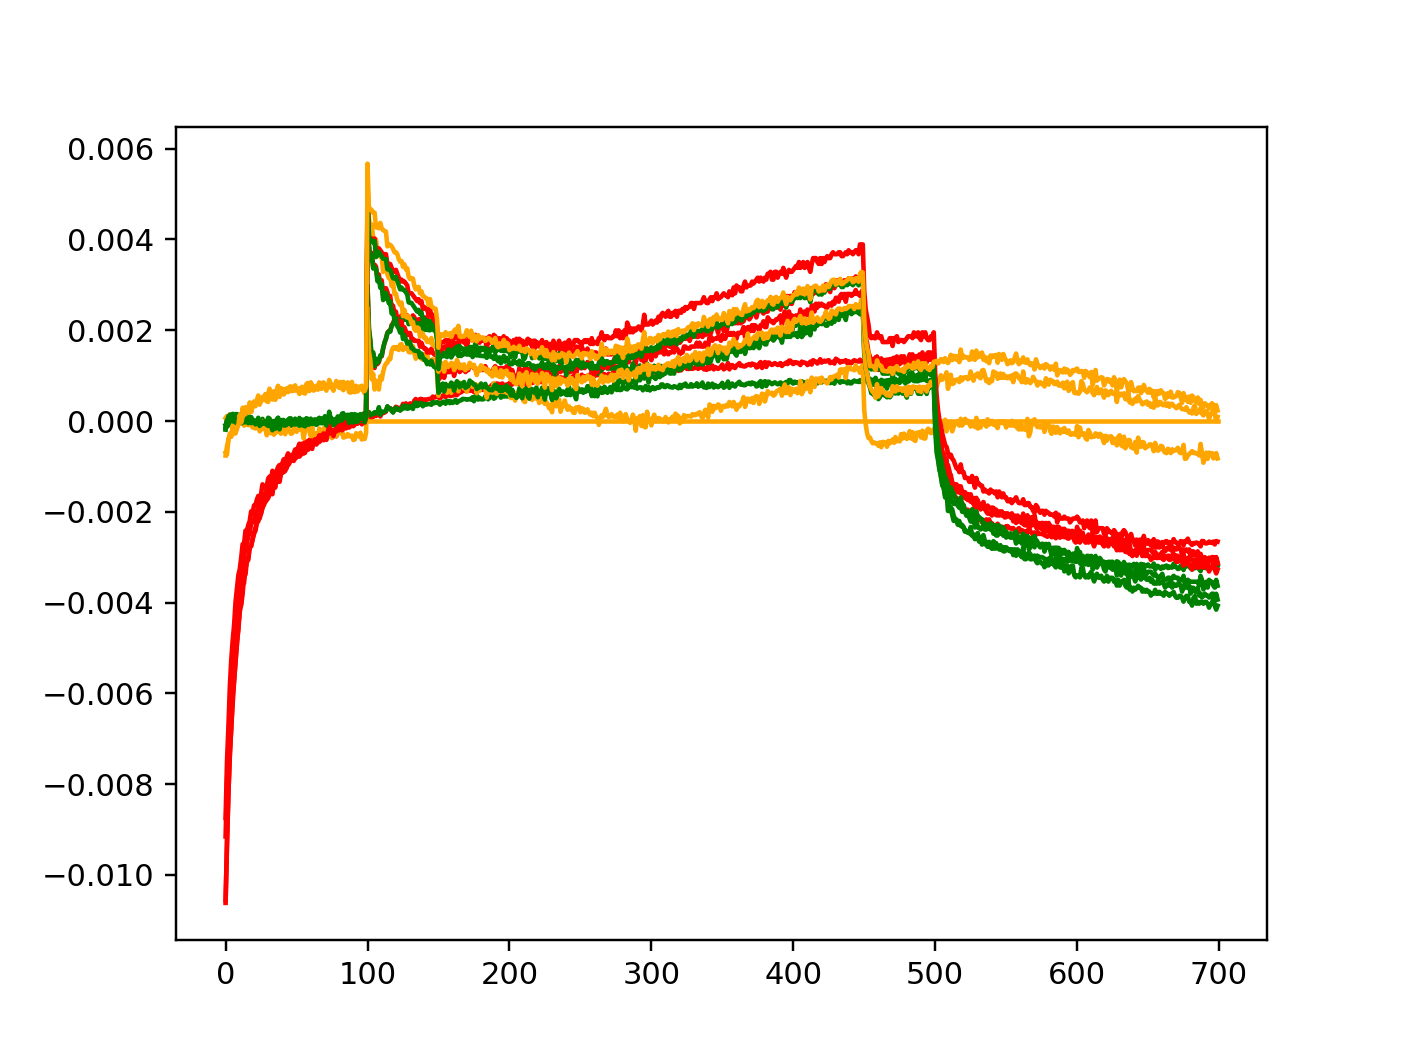

In [628]:
plt.figure()
for i in range(0,len(sample_df['535_rDA'])):
    plt.plot(sample_df['535_rDA'][i], color='red')
    plt.plot(sample_df['535_BCOR'][i], color='green')
    plt.plot(sample_df['535_calc_m_b'][i], color='orange')
plt.show()


In [644]:
#smooth the data using a savgol_filter 

from scipy.signal import savgol_filter

def smoothTraces(sample_df,wavelengths,suffix,smooth_window=50,newSuffix = '_smooth'):

    for i in range(len(wavelengths)):
        
        wl = wavelengths[i]
        tName = str(wl) + suffix
        newColName= tName + newSuffix
        sample_df[newColName] = 0
        sample_df[newColName] = sample_df[newColName].astype('object')
        for traceNum in range (0, len(sample_df[tName])):  # cycle through each trace in experiment 
            subtrace=sample_df[tName][traceNum]
            smoothedTrace=savgol_filter(subtrace , smooth_window, 3)
            sample_df[newColName][traceNum]=smoothedTrace

smoothTraces(sample_df, wavelengths, '_calc_m_b', 5, '_smooth')


/Users/davidkramer/anaconda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/davidkramer/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


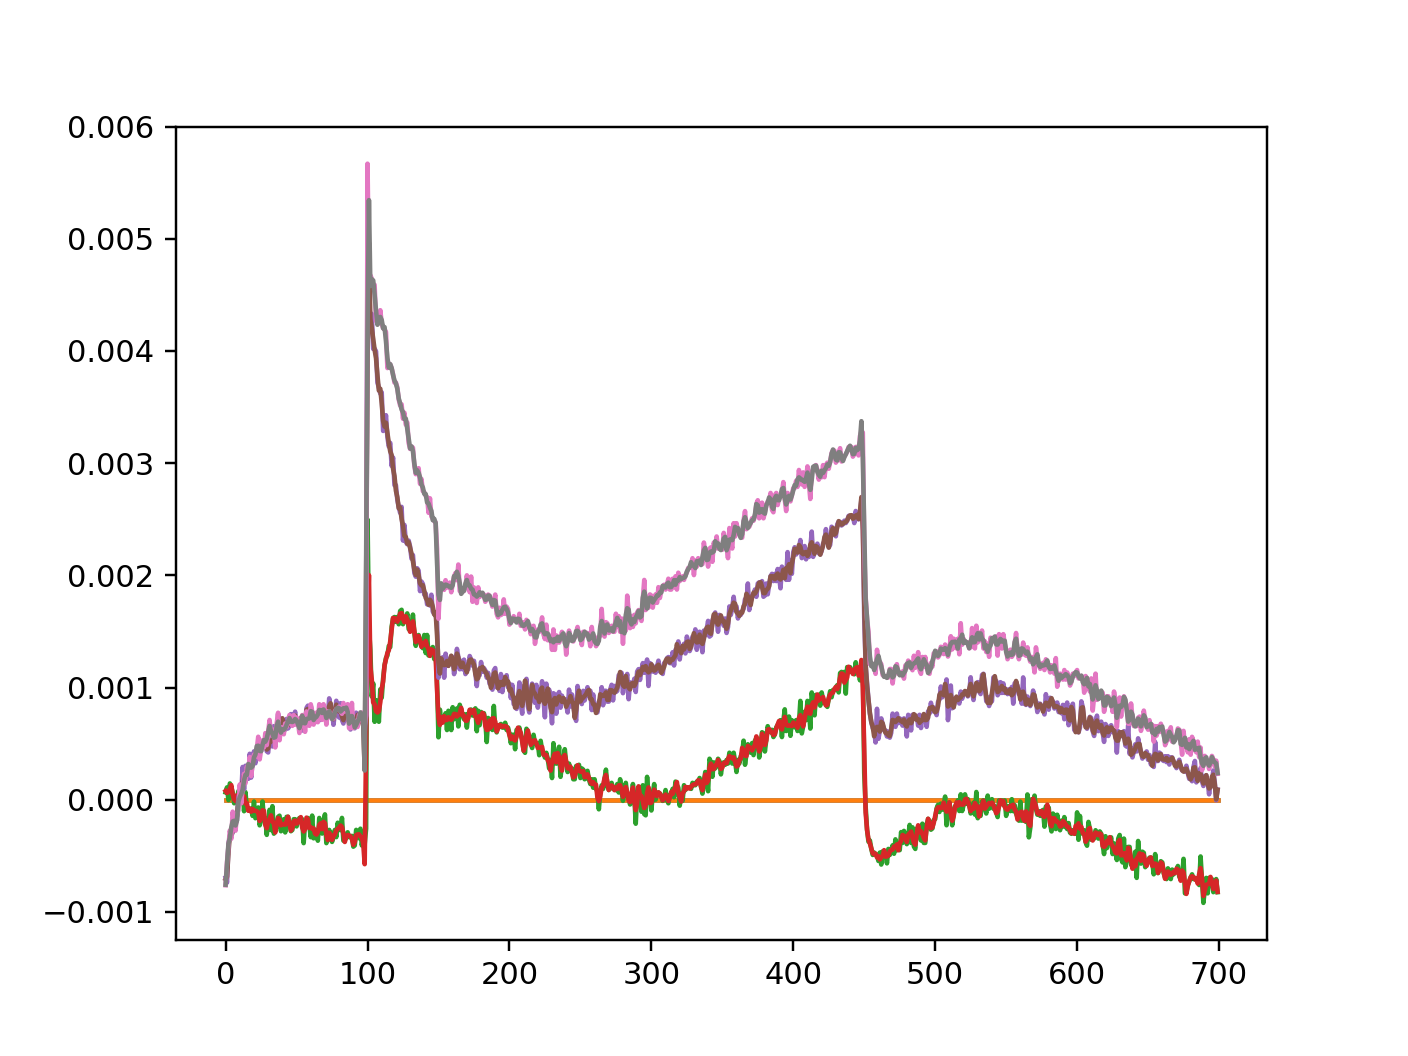

In [645]:
plt.figure()
wl='535'
for i in range(0, len(sample_df[wl +'_calc_smooth'])):
    plt.plot(sample_df[str(wl)+'_calc_m_b'][i])
    plt.plot(sample_df[str(wl)+'_calc_m_b_smooth'][i])
plt.show()


In [646]:
# gather decay associated spectra in new object
# For example, 
# def generateDAS(df, wavelengths, suffix):
#     useCols=[]
#     for wl in wavelengths:
#         useCols.append(prefix + str(wl))

#     das={}
#     for base_file_name in all_file_names:
#         das[base_file_name]=[]

#     for base_file_name in all_file_names:
#         numberSubtraces = len(corSmoothed[base_file_name][useCols[0]])
#         lengthOfSubTracesNew = len(corSmoothed[base_file_name][useCols[0]][0])
#         for i in range(0,numberSubtraces):
#             for ii in range(0, lengthOfSubTracesNew):
#                 temp=[]
#                 for colName in useCols:
#                     temp.append(corSmoothed[base_file_name][colName][i][ii])
#                 das[base_file_name].append(temp)
#     return das


def generateDAS(sample_df, wavelengths=df['measuring_light_names'][0], suffix='_rDA', newColName='das'):

    #sample_df[colName]= pd.Series([0]*len(sample_df))
    #sample_df[colName] = [[0]*len(sample_df)]
    sample_df[newColName] = 0
    sample_df[newColName] = sample_df[newColName].astype('object')

    #wavelengths=['475', '488', '505', '520', '535', '545']
    for t in range(0,len(sample_df)):
        dass=[]
        wl = str(wavelengths[0]) #start with the first wl
        for pt in range(len(sample_df[wl + suffix][t])): #cycle through all points in the trace
            das=[]
            for wl in range(len(wavelengths)):
                das.append(sample_df[str(wavelengths[wl]) + suffix][t][pt])
            dass.append(das)
        sample_df[newColName][t] = dass

generateDAS(sample_df, wavelengths, '_calc_m_b_smooth', 'das')

/Users/davidkramer/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


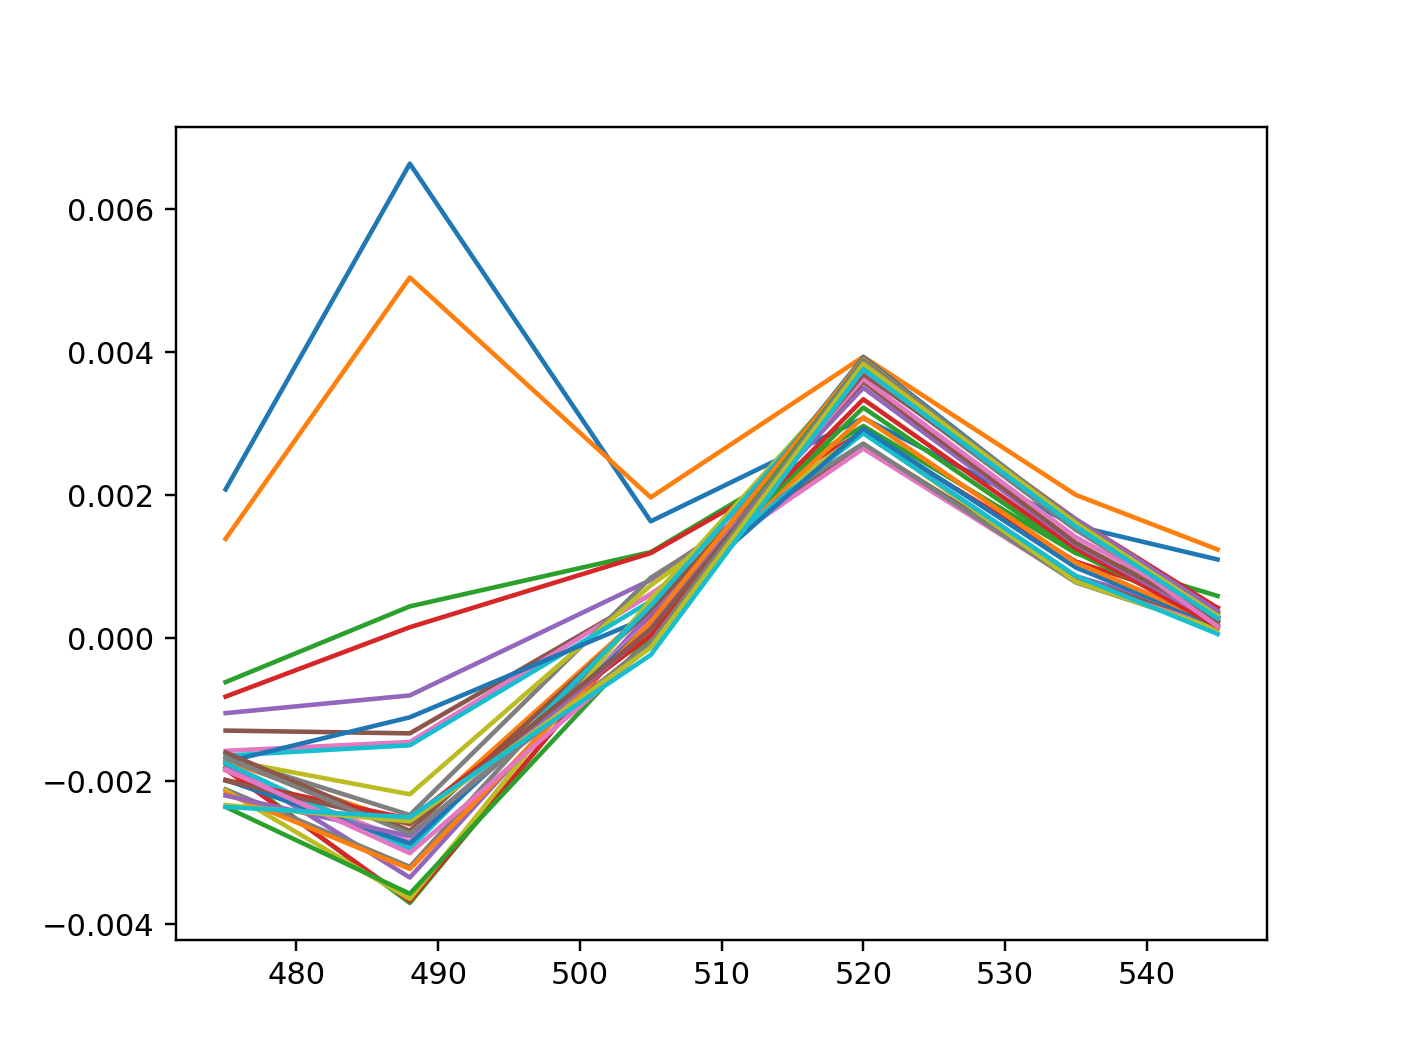

In [647]:
plt.figure()
for i in range(100,130):
    plt.plot(wavelengths,sample_df['das'][1][i])
plt.show()


In [648]:
wavelengthV=[475,488,505,520,535,545]

<IPython.core.display.Javascript object>


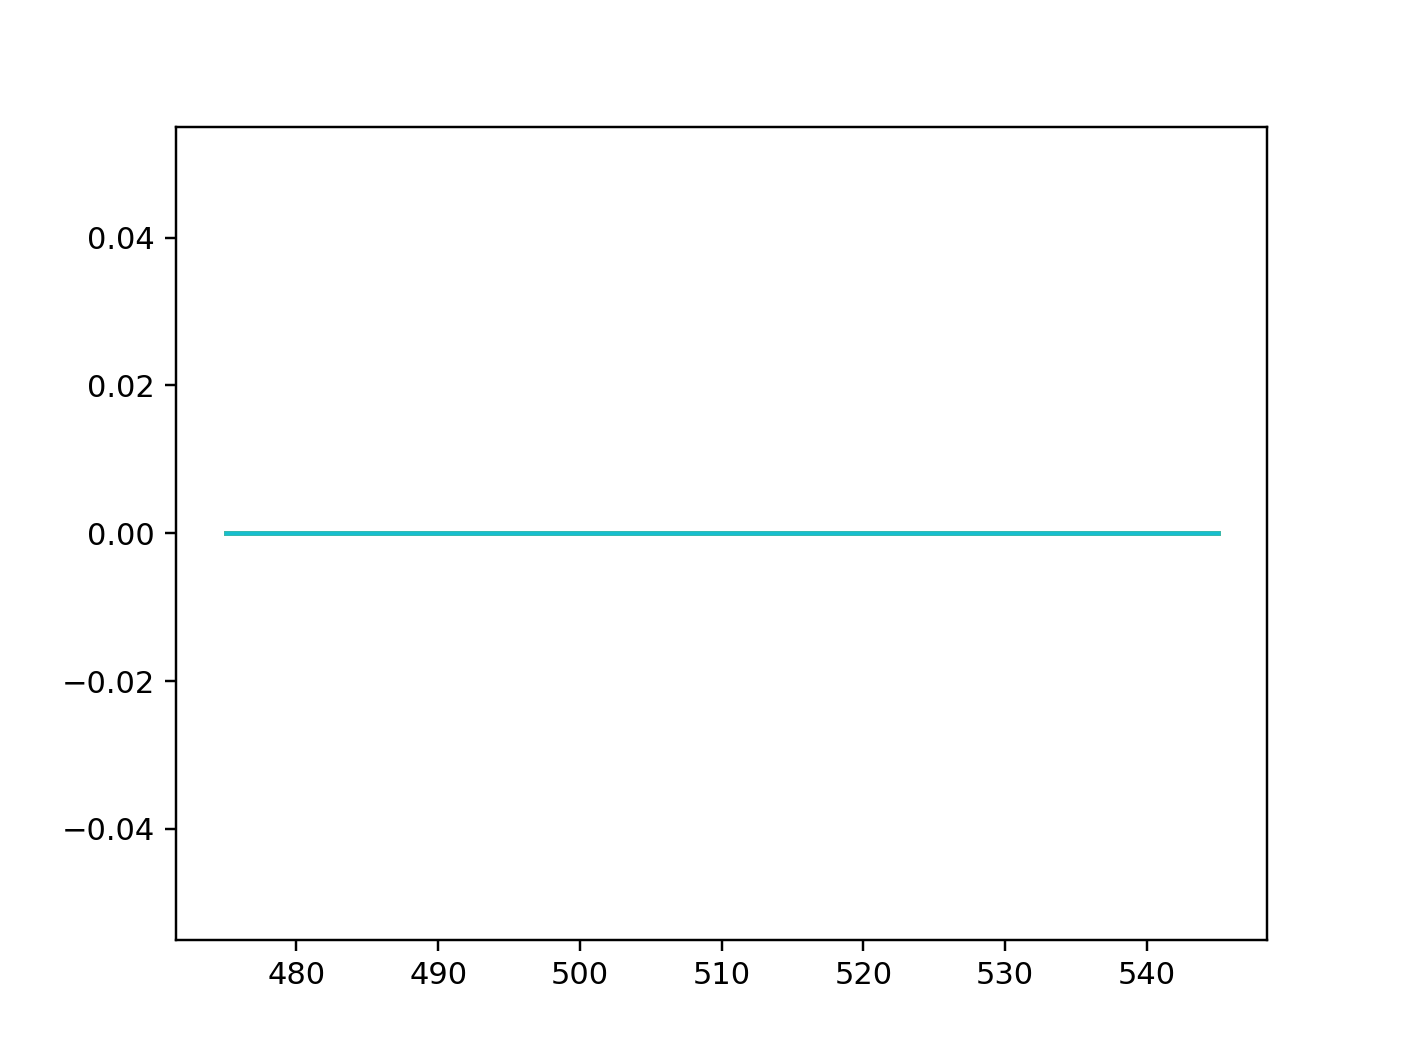

<IPython.core.display.Javascript object>


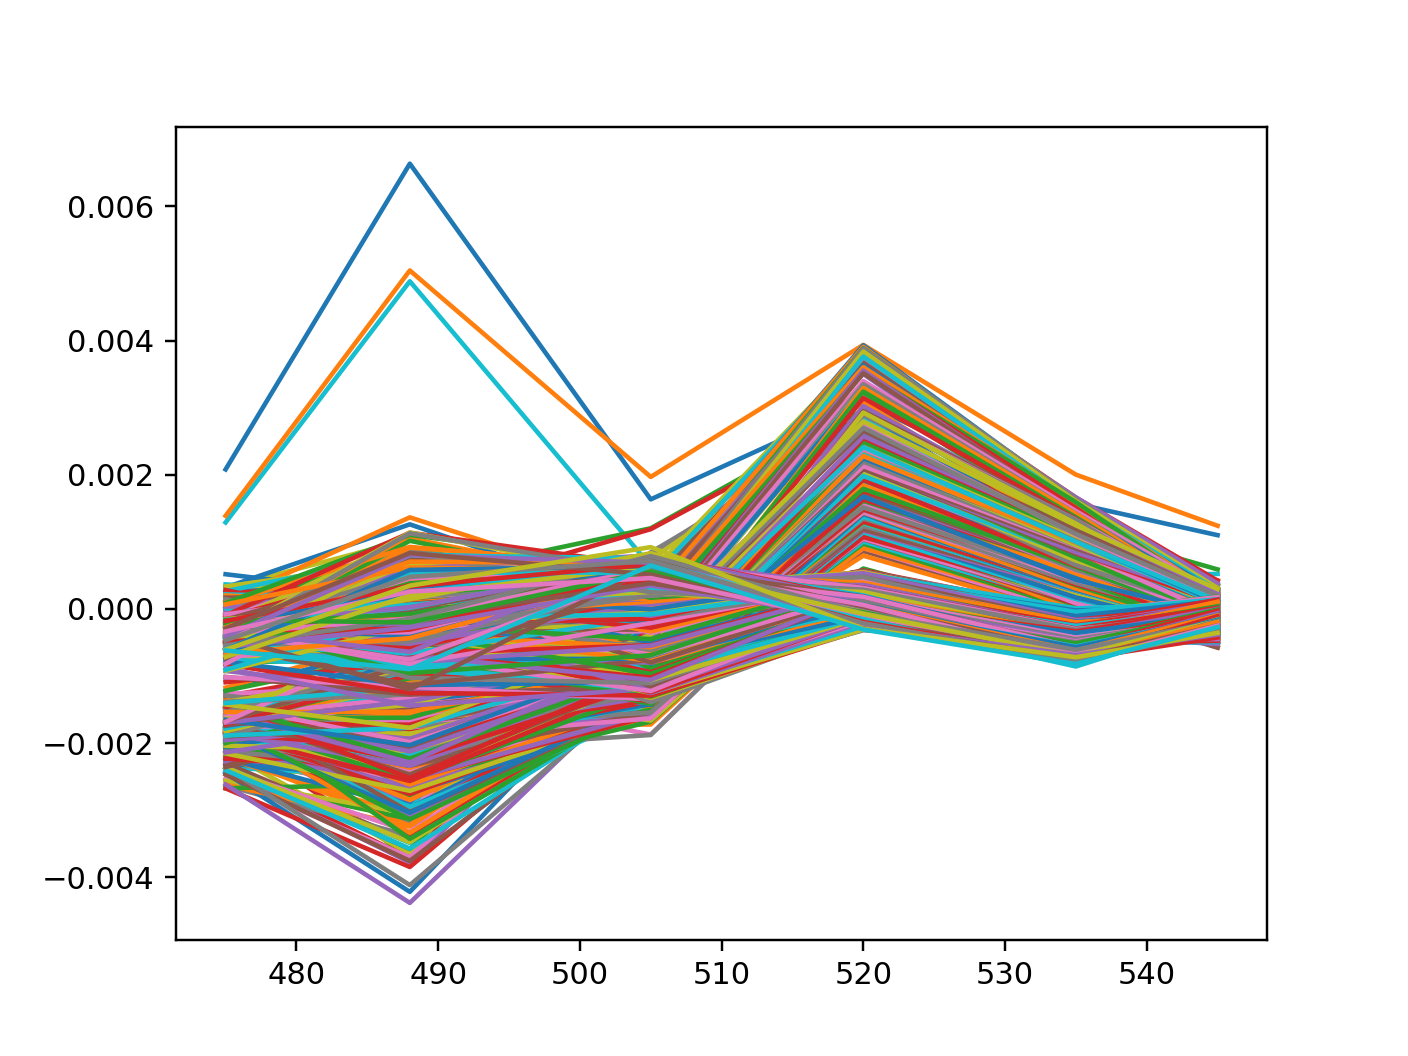

<IPython.core.display.Javascript object>


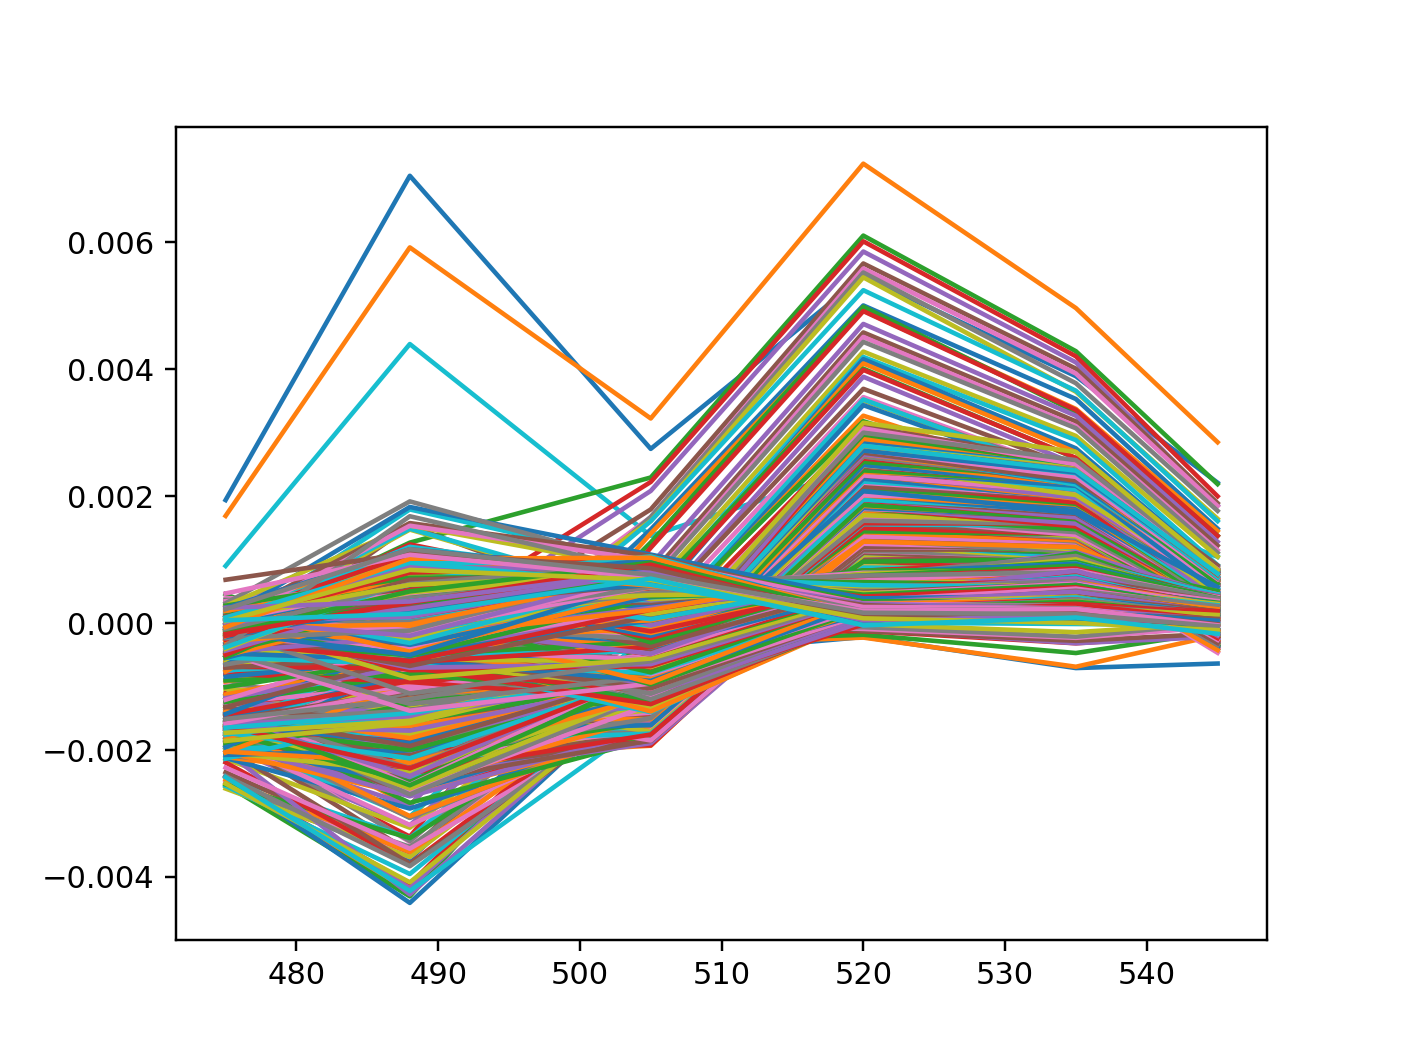

<IPython.core.display.Javascript object>


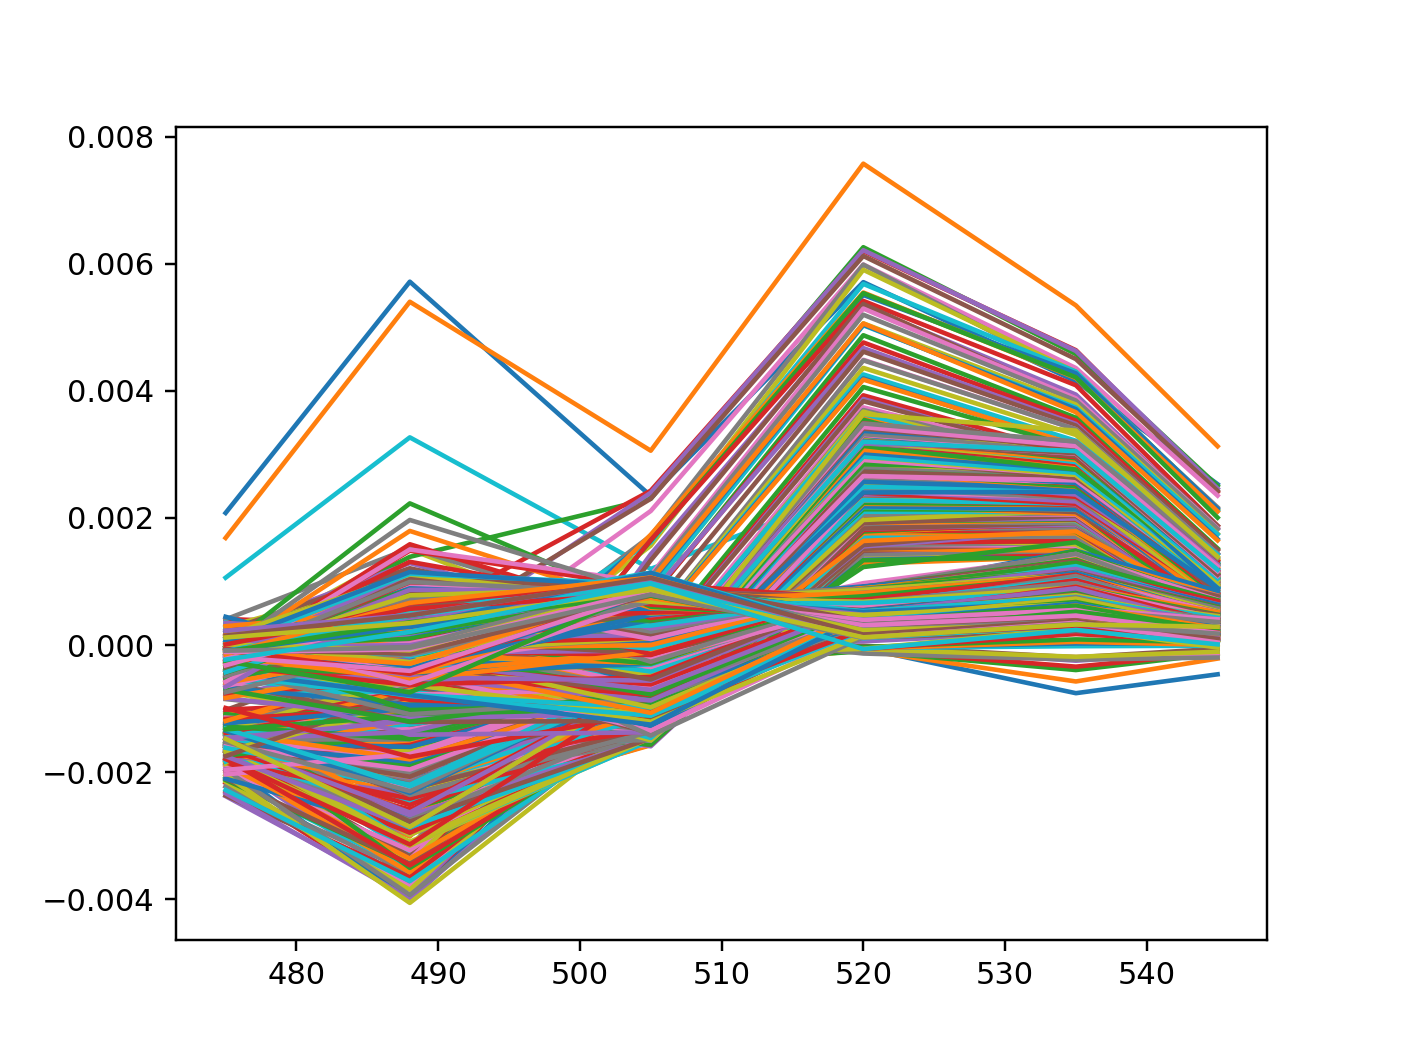

In [649]:
for dfi in range(0, len(sample_df)):
    plt.figure()

    for i in range(len(das)):
        plt.plot(wavelengthV, sample_df['das'][dfi][i])
    plt.show()



<IPython.core.display.Javascript object>


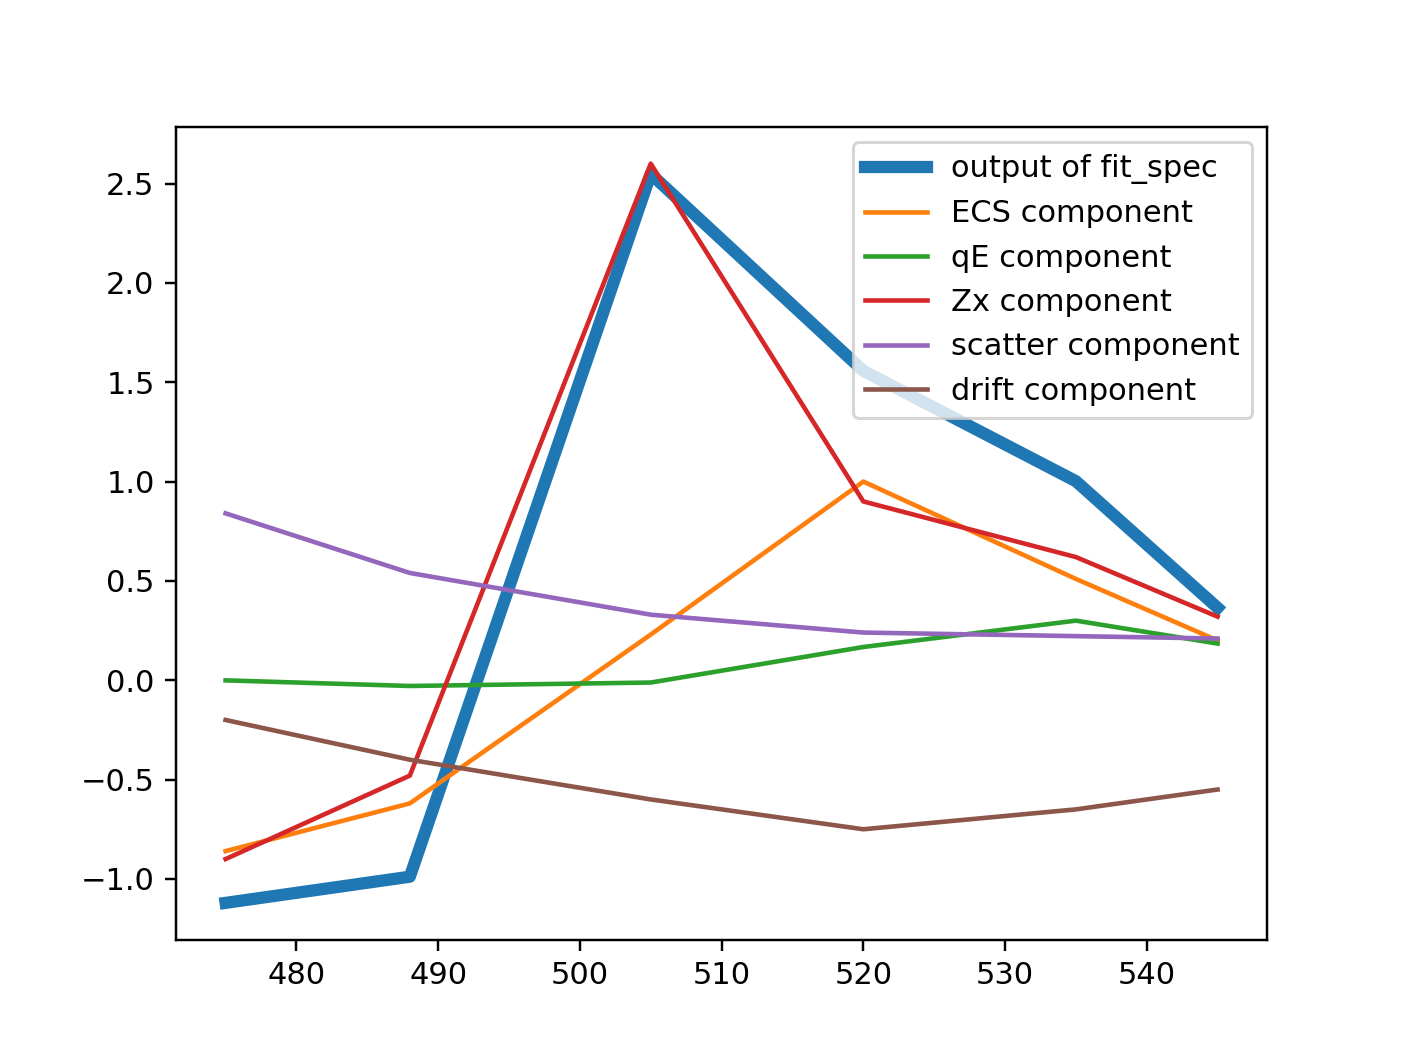

In [650]:
from scipy.optimize import curve_fit #see the following link for info on curve_fit

#http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.curve_fit.html

# fit_spec calculates a spectrum from the linear combination of 
# components, each with a distinct spectrum
wavelengths = [475,488,505,520,535,545]
ecs=np.array([-0.86,-0.62,0.23,1.,0.51, 0.2])
qE=np.array([-.01,-.5,-.2,2.9,5.2,3.2])
qE=qE/np.max(qE)
Zx=np.array([-0.45,-0.24,1.3,0.45,0.31,0.16])
#Zx=Zx-.3
scatter=np.array([1.1,.6,.25,.1,.07,.05])
scatter = scatter + .3
drift=np.array([.2,.4,.6,.75,.65,.55])

from scipy.signal import savgol_filter

def fit_spec_5(x,a,b,c,d,e): #function to fit the spectroscopic data
    global ecs
    global qE
    global Zx
    global scatter
    global drift
    
    # Expecting absorbance data from 5 wavelengths per time point
    # The component spectra also have 7 wavelength
    #print(len(components[0]),len(components[1]),len(components[2]),len(components[3]))
    fit_spectrum = a*ecs + b*qE + c*Zx + d*scatter + e*drift
    return (fit_spectrum)

#in the following, I test the funciton fit_spec by supplying
# it with extents of each component. 

t_ecs=1.0
t_qE=0.3
t_Zx=2.0
t_scatter=0.6
t_drift=-1.0

test_result=fit_spec(0,t_ecs,t_qE,t_Zx,t_scatter,t_drift)

# I plot the results of fit_spec together with the 
# scaled spectra of each component.,

plt.figure()
plt.plot(wavelengths, test_result, lw=4, label='output of fit_spec')

plt.plot(wavelengths, t_ecs*ecs, label='ECS component')
plt.plot(wavelengths, t_qE*qE, label='qE component')
plt.plot(wavelengths, t_Zx*Zx, label='Zx component')
plt.plot(wavelengths, t_scatter*scatter, label='scatter component')
plt.plot(wavelengths, t_drift*drift, label='drift component')

plt.legend()
plt.show()


In [651]:

import matplotlib.cm as cm
#plt.scatter(x, y, c=t, cmap=cm.cmap_name)

def fitDAS_5(sample_df, wavelengths, dasColName, newSuffix=''):
    components = ['ecs', 'qE', 'Zx', 'scatter', 'drift']
    for c in components:
        newColName= c + newSuffix
        sample_df[newColName] = 0
        sample_df[newColName] = sample_df[newColName].astype('object')

    for traceNum in range (0, len(sample_df[dasColName])):  # cycle through each trace in experiment 
        comp={}
        for c in components:
            comp[c]=[]
       
        for time_index in range(len(sample_df[dasColName][0])):
            y_data=sample_df[dasColName][traceNum][time_index]
            popt, pcov = curve_fit(fit_spec, wavelengths, y_data, p0=[0,0,0,0,0])
            for i, c in enumerate(components):
                comp[c].append(popt[i])
            
        for c in components:
            newColName= c + newSuffix
            sample_df[newColName][traceNum] = comp[c]




In [652]:
sample_df['ecs'][0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [653]:
popt, pcov = curve_fit(fit_spec, wavelengths, sample_df['das'][0][0], p0=[0,0,0,0,0])


In [654]:
fitDAS_5(sample_df, wavelengths, 'das', newSuffix='')


/Users/davidkramer/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [655]:
sample_df['ecs']

0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.000435263861675044, 0.00025932195245693225,...
2    [-6.876021531821073e-05, 0.0001382232315448249...
3    [0.0012134487612920875, 0.0005606309836382168,...
Name: ecs, dtype: object

<IPython.core.display.Javascript object>


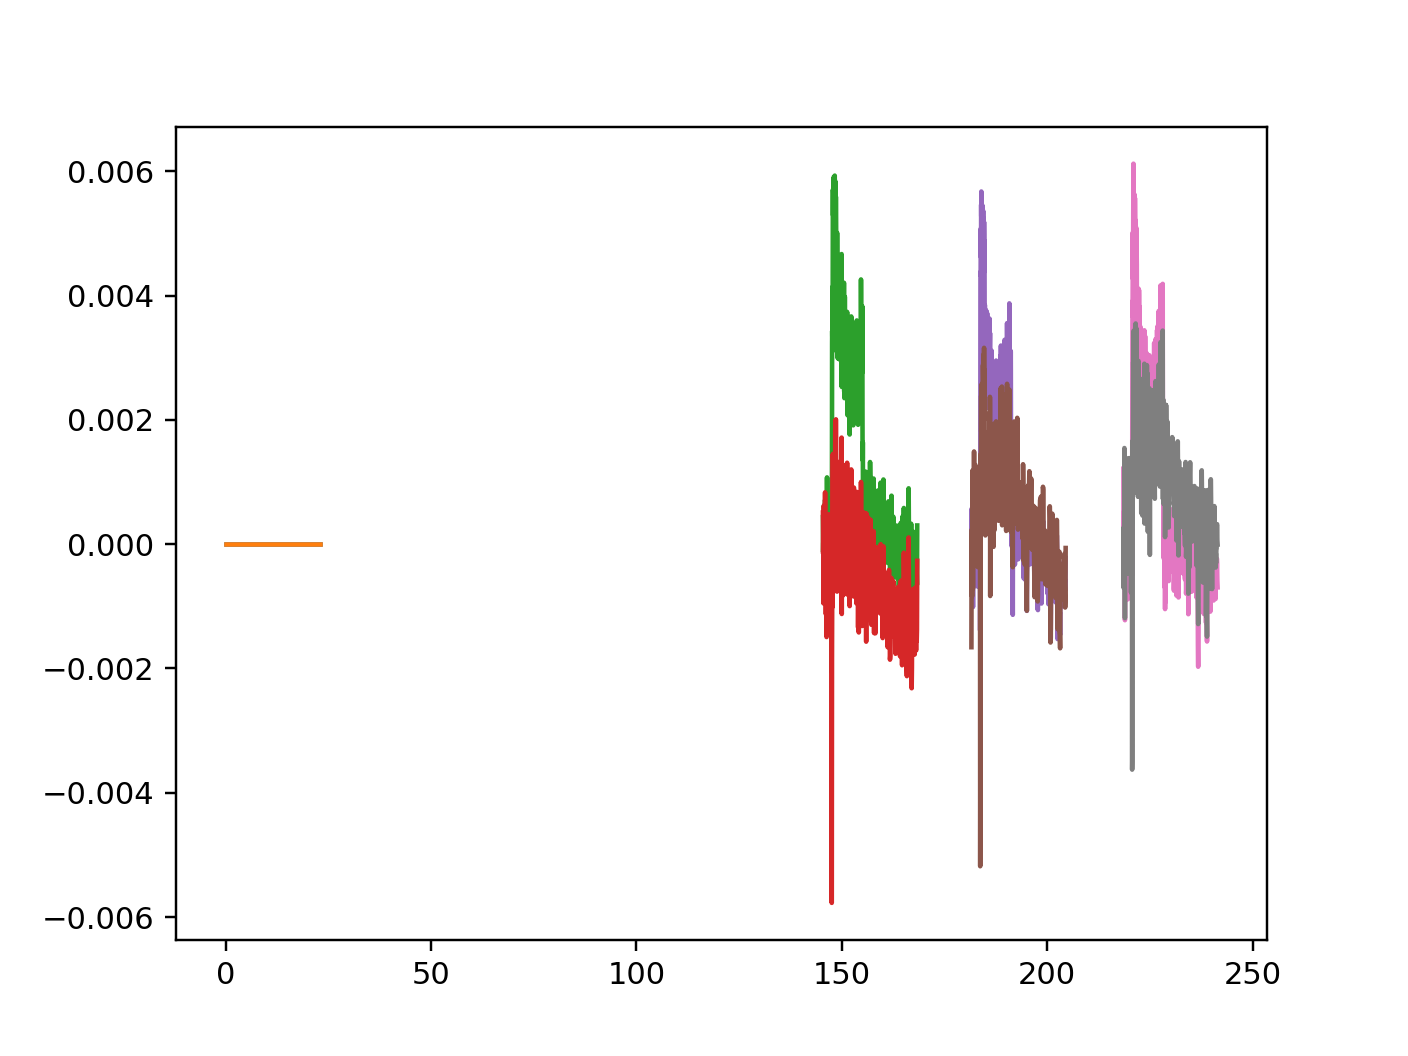

In [656]:
plt.figure()
for i in range(len(sample_df)):
    plt.plot(sample_df['505_time'][i], sample_df['ecs'][i])
    plt.plot(sample_df['505_time'][i], sample_df['qE'][i])
plt.show()